In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
trades = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")

display(trades.head())
display(fear_greed.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
print("Historical Trades Columns:")
print(trades.columns)

print("\nFear & Greed Columns:")
print(fear_greed.columns)


Historical Trades Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Fear & Greed Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [4]:
trades.info()
fear_greed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date

fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date
fear_greed.rename(columns={'classification': 'sentiment'}, inplace=True)



In [8]:
df = trades.merge(
    fear_greed[['date', 'sentiment']],
    on='date',
    how='inner'
)

df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [9]:
df['win'] = df['Closed PnL'] > 0


In [10]:
sentiment_analysis = df.groupby('sentiment').agg(
    total_trades=('Closed PnL', 'count'),
    win_rate=('win', 'mean'),
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum')
).reset_index()

sentiment_analysis


,sentiment,total_trades,win_rate,avg_pnl,total_pnl
0,Extreme Fear,21400,0.370607,34.537862,7.391102e+05
1,Extreme Greed,39992,0.464943,67.892861,2.715171e+06
2,Fear,61837,0.420768,54.290400,3.357155e+06
3,Greed,50303,0.384828,42.743559,2.150129e+06
4,Neutral,37686,0.396991,34.307718,1.292921e+06


In [11]:
trader_analysis = df.groupby('Account').agg(
    total_trades=('Closed PnL', 'count'),
    win_rate=('win', 'mean'),
    total_pnl=('Closed PnL', 'sum')
).reset_index()

trader_analysis.sort_values('total_pnl', ascending=False).head(10)


,Account,total_trades,win_rate,total_pnl
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733,0.337134,2.143383e+06
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,0.359612,1.600230e+06
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192,0.467582,9.401638e+05
13,0x513b8629fe877bb581bf244e326a047b249c4ff1,12236,0.401193,8.404226e+05
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,0.428230,8.360806e+05
11,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,4356,0.486226,6.777471e+05
15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,1590,0.345912,4.293556e+05
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1237,0.484236,4.165419e+05
17,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,0.810876,3.790954e+05
16,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1424,0.303371,3.605395e+05


In [12]:
direction_bias = df.groupby(['sentiment', 'Direction']).size().unstack(fill_value=0)
direction_bias


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion
sentiment,,,,,,,,,,,,
Extreme Fear,0,807,6241,3117,0,5,7005,3174,1042,0,6,3
Extreme Greed,0,5132,7186,6497,0,7,6300,7663,7164,0,11,32
Fear,0,3207,17260,9221,0,14,17824,10887,3364,0,18,42
Greed,8,4685,7998,11322,1,16,8544,11664,5986,1,23,55
Neutral,0,2885,9993,5850,0,15,10222,6353,2346,0,12,10


In [13]:
df.groupby('sentiment')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


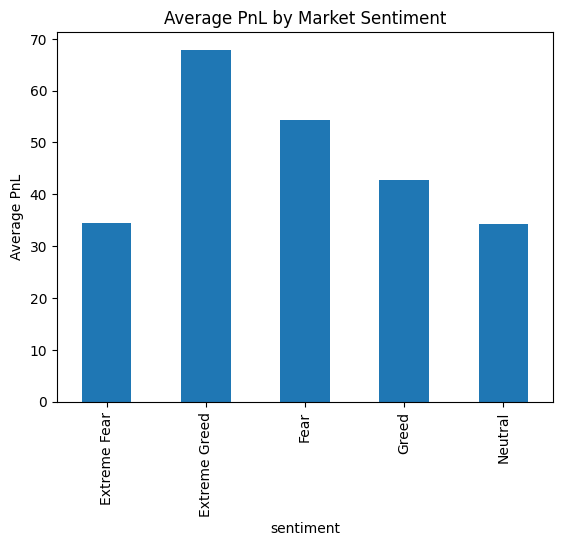

In [14]:
sentiment_analysis.plot(
    x='sentiment',
    y='avg_pnl',
    kind='bar',
    title='Average PnL by Market Sentiment',
    legend=False
)
plt.ylabel("Average PnL")
plt.show()


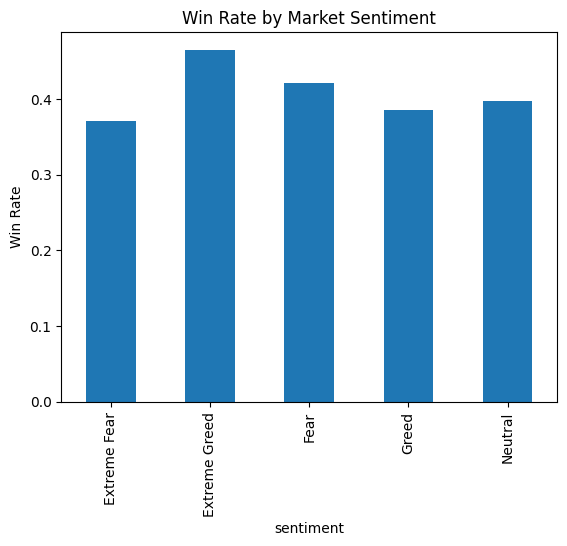

In [15]:
sentiment_analysis.plot(
    x='sentiment',
    y='win_rate',
    kind='bar',
    title='Win Rate by Market Sentiment',
    legend=False
)
plt.ylabel("Win Rate")
plt.show()


In [16]:
best = sentiment_analysis.sort_values('avg_pnl', ascending=False).iloc[0]

print(
    f"Traders performed best during '{best.sentiment}' market conditions "
    f"with an average PnL of {best.avg_pnl:.2f}."
)


Traders performed best during 'Extreme Greed' market conditions with an average PnL of 67.89.
